In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import math
from scipy import stats
import os
pd.options.display.float_format = '{:.6f}'.format

df = pd.read_csv("energy_cleaned.csv")

In [2]:
df

,Entity,Year,electricity_access_%,clean_fuels_access_%,renewable_energy_share_final_%,electricity_fossil_fuels_Twh,electricity_nuclear_Twh,electricity_renewables_Twh,low_carbon_electricity_%,energy_intensity_mj_ppp,co2_emissions_kt,renewable_energy_share_primary_%,gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude,primary_energy_consumption_per_capita_twh
0,Algeria,2000,98.973100,97.100000,0.430000,23.840000,0.000000,0.050000,0.209293,4.180000,80050.000000,0.053235,3.800000,1765.027146,18,2381741,28.033886,1.659626,0.000010
1,Algeria,2001,98.966870,97.300000,0.430000,24.960000,0.000000,0.070000,0.279664,4.070000,78650.000000,0.065218,3.000000,1740.606654,18,2381741,28.033886,1.659626,0.000010
2,Algeria,2002,98.953060,97.800000,0.510000,25.940000,0.000000,0.060000,0.230769,4.120000,82400.001530,0.051677,5.600000,1781.828908,18,2381741,28.033886,1.659626,0.000010
3,Algeria,2003,98.934010,98.000000,0.470000,27.540000,0.000000,0.260000,0.935252,4.080000,88190.002440,0.228104,7.200000,2103.381291,18,2381741,28.033886,1.659626,0.000010
4,Algeria,2004,98.912080,98.200000,0.440000,29.140000,0.000000,0.250000,0.850630,3.960000,89489.997860,0.206787,4.300000,2610.185422,18,2381741,28.033886,1.659626,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,Uzbekistan,2016,100.000000,85.200000,1.610000,48.750000,0.000000,7.250000,12.946428,7.820000,105230.003400,3.567936,5.932151,2704.677188,79,447400,41.377491,64.585262,0.000016
1487,Uzbekistan,2017,100.000000,84.900000,1.750000,49.710000,0.000000,8.350000,14.381675,7.880000,109529.998800,3.972285,4.395275,1916.764642,79,447400,41.377491,64.585262,0.000017
1488,Uzbekistan,2018,100.000000,84.300000,1.490000,53.580000,0.000000,5.850000,9.843514,9.050000,112470.001200,2.927033,5.354997,1597.068337,79,447400,41.377491,64.585262,0.000016
1489,Uzbekistan,2019,100.000000,84.600000,1.570000,53.640000,0.000000,6.470000,10.763600,8.370000,116709.999100,3.197033,5.709632,1784.009816,79,447400,41.377491,64.585262,0.000016


In [3]:
df.set_index(['Entity', 'Year'], inplace=True)

In [4]:
df

electricity_access_%  clean_fuels_access_%  \
Entity     Year                                               
Algeria    2000             98.973100             97.100000   
           2001             98.966870             97.300000   
           2002             98.953060             97.800000   
           2003             98.934010             98.000000   
           2004             98.912080             98.200000   
...                               ...                   ...   
Uzbekistan 2016            100.000000             85.200000   
           2017            100.000000             84.900000   
           2018            100.000000             84.300000   
           2019            100.000000             84.600000   
           2020            100.000000             84.250000   

                 renewable_energy_share_final_%  electricity_fossil_fuels_Twh  \
Entity     Year                                                                 
Algeria    2000                        0.430000                     23.840000   
           2001                        0.430000                     24.960000   
           2002                        0.510000                     25.940000   
           2003                        0.470000                     27.540000   
           2004                        0.440000                     29.140000   
...                                         ...                           ...   
Uzbekistan 2016                        1.610000                     48.750000   
           2017                        1.750000                     49.710000   
           2018                        1.490000                     53.580000   
           2019                        1.570000                     53.640000   
           2020                        1.570000                     50.930000   

                 electricity_nuclear_Twh  electricity_renewables_Twh  \
Entity     Year                                                        
Algeria    2000                 0.000000                    0.050000   
           2001                 0.000000                    0.070000   
           2002                 0.000000                    0.060000   
           2003                 0.000000                    0.260000   
           2004                 0.000000                    0.250000   
...                                  ...                         ...   
Uzbekistan 2016                 0.000000                    7.250000   
           2017                 0.000000                    8.350000   
           2018                 0.000000                    5.850000   
           2019                 0.000000                    6.470000   
           2020                 0.000000                    5.010000   

                 low_carbon_electricity_%  energy_intensity_mj_ppp  \
Entity     Year                                                      
Algeria    2000                  0.209293                 4.180000   
           2001                  0.279664                 4.070000   
           2002                  0.230769                 4.120000   
           2003                  0.935252                 4.080000   
           2004                  0.850630                 3.960000   
...                                   ...                      ...   
Uzbekistan 2016                 12.946428                 7.820000   
           2017                 14.381675                 7.880000   
           2018                  9.843514                 9.050000   
           2019                 10.763600                 8.370000   
           2020                  8.956025                 8.370000   

                 co2_emissions_kt  renewable_energy_share_primary_%  \
Entity     Year                                                       
Algeria    2000      80050.000000                          0.053235   
           2001      78650.000000                          0.065218   
           

I begin by comparing features against the target.

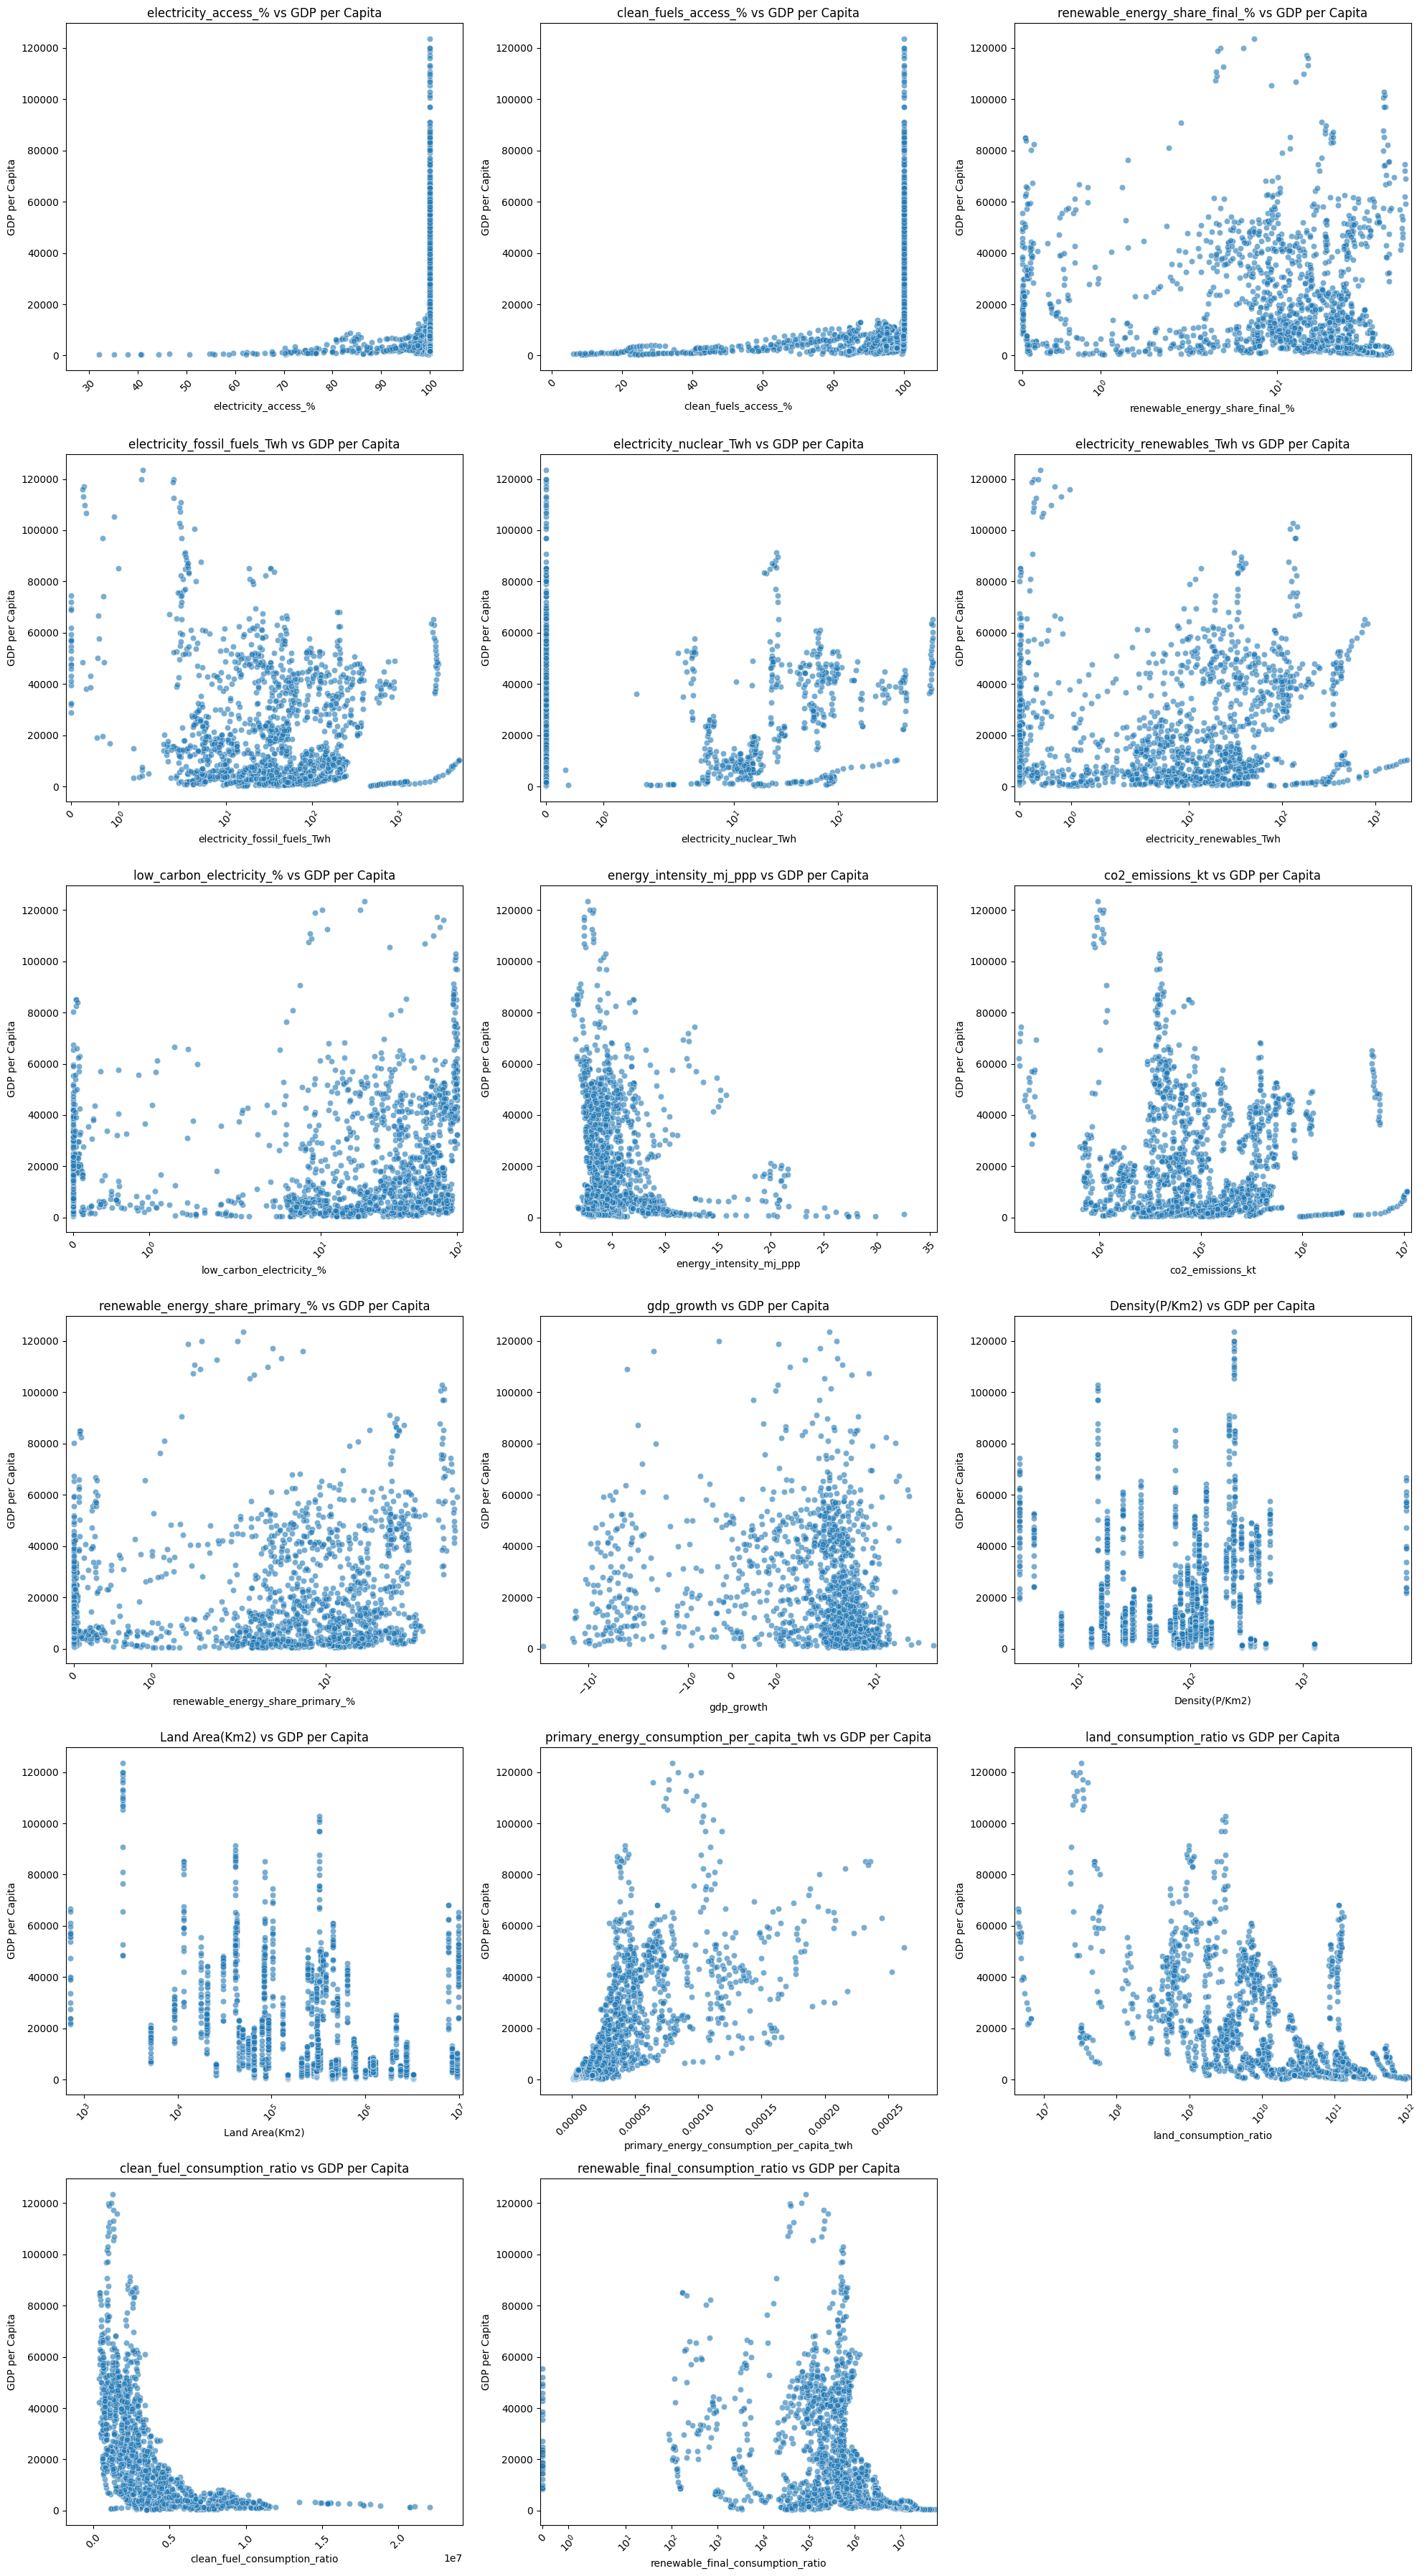

In [20]:
features = [col for col in df.columns if col not in ['Latitude', 'Longitude', 'gdp_per_capita']]
n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    sns.scatterplot(data=df, x=feature, y='gdp_per_capita', alpha=0.6, ax=ax)


    ax.set_title(f'{feature} vs GDP per Capita', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('GDP per Capita', fontsize=10)


    x_min, x_max = df[feature].min(), df[feature].max()
    x_range = x_max - x_min

    if x_range == 0:
        ax.set_xlim(x_min - 1, x_max + 1)
    elif x_min <= 0 or x_max / max(x_min, 1e-10) > 1000:

        ax.set_xscale('symlog')
        ax.set_xlim(x_min - 0.1*abs(x_min or 1), x_max + 0.1*abs(x_max or 1))
    else:
        ax.set_xlim(x_min - 0.1*x_range, x_max + 0.1*x_range)

    ax.tick_params(axis='x', rotation=45)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Positive relationships to target: <br>
- clean fuel access (linear) <br>
- electricity access (linear) <br>  
- primary energy consumption per capita (linear) <--- **strongest, let's keep this in mind for later**  <br>  
- electricity from renewables, nuclear (non linear) <br>
- low carbon %, density, renewable share primary (non linear) <br>

Inverse relationships: <br>
- energy intensity (linear) <br>

Unclear: <br>
- electricity from fossil fuels, land area, co2 emissions, renweable energy share final (non linear) <br>



Our data is heterogenous, so I'll do a PCA analysis to visualize the data in a lower dimension.

In [6]:
from sklearn.preprocessing import MinMaxScaler
def min_max_scaler(df, target_columns=['Latitude', 'Longitude', 'gdp_per_capita']):
    features = [col for col in df.columns if col not in target_columns]
    features_df = df[features]
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features_df)
    features_scaled_df = pd.DataFrame(features_scaled, columns=features_df.columns)
    return features_scaled_df

In [7]:
features_scaled_df = min_max_scaler(df)

I scale with MinMaxScaler to keep all values >= 0 for better context.

In [8]:
from sklearn.decomposition import PCA
features_PCA = PCA().fit(features_scaled_df)

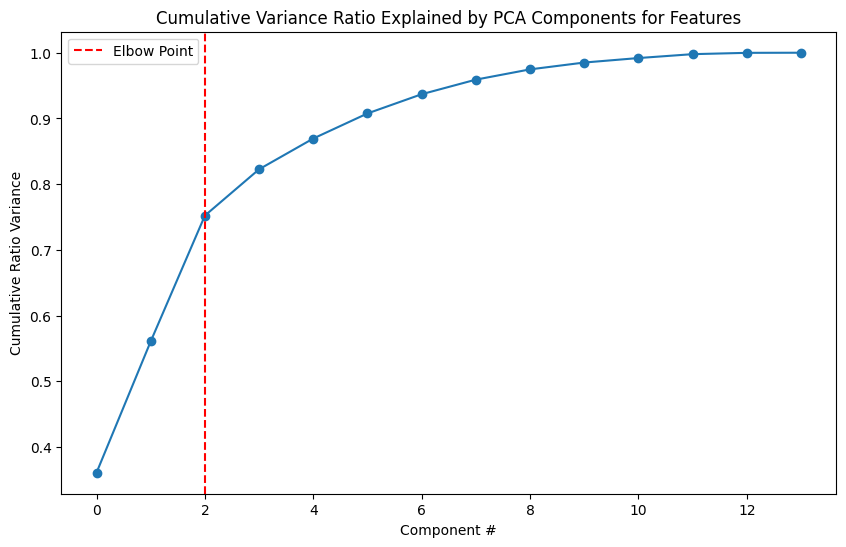

In [9]:
# Create the plot
plt.subplots(figsize=(10, 6))
plt.plot(features_PCA.explained_variance_ratio_.cumsum(), marker='o')

# Set labels and title
plt.xlabel('Component #')
plt.ylabel('Cumulative Ratio Variance')
plt.title('Cumulative Variance Ratio Explained by PCA Components for Features')

# Identify the elbow point (manually set this value based on your analysis)
elbow_point = 2  # Adjust this value based on your specific analysis

# Add a vertical line at the elbow point
plt.axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point')

# Add a legend
plt.legend()

# Show the plot
plt.show()

We can identify the elbow at 3 components, ~ 75% of the variance.

In [10]:
features_pca_x = features_PCA.transform(features_scaled_df)

In [11]:
features_pca_x.shape

(1491, 14)

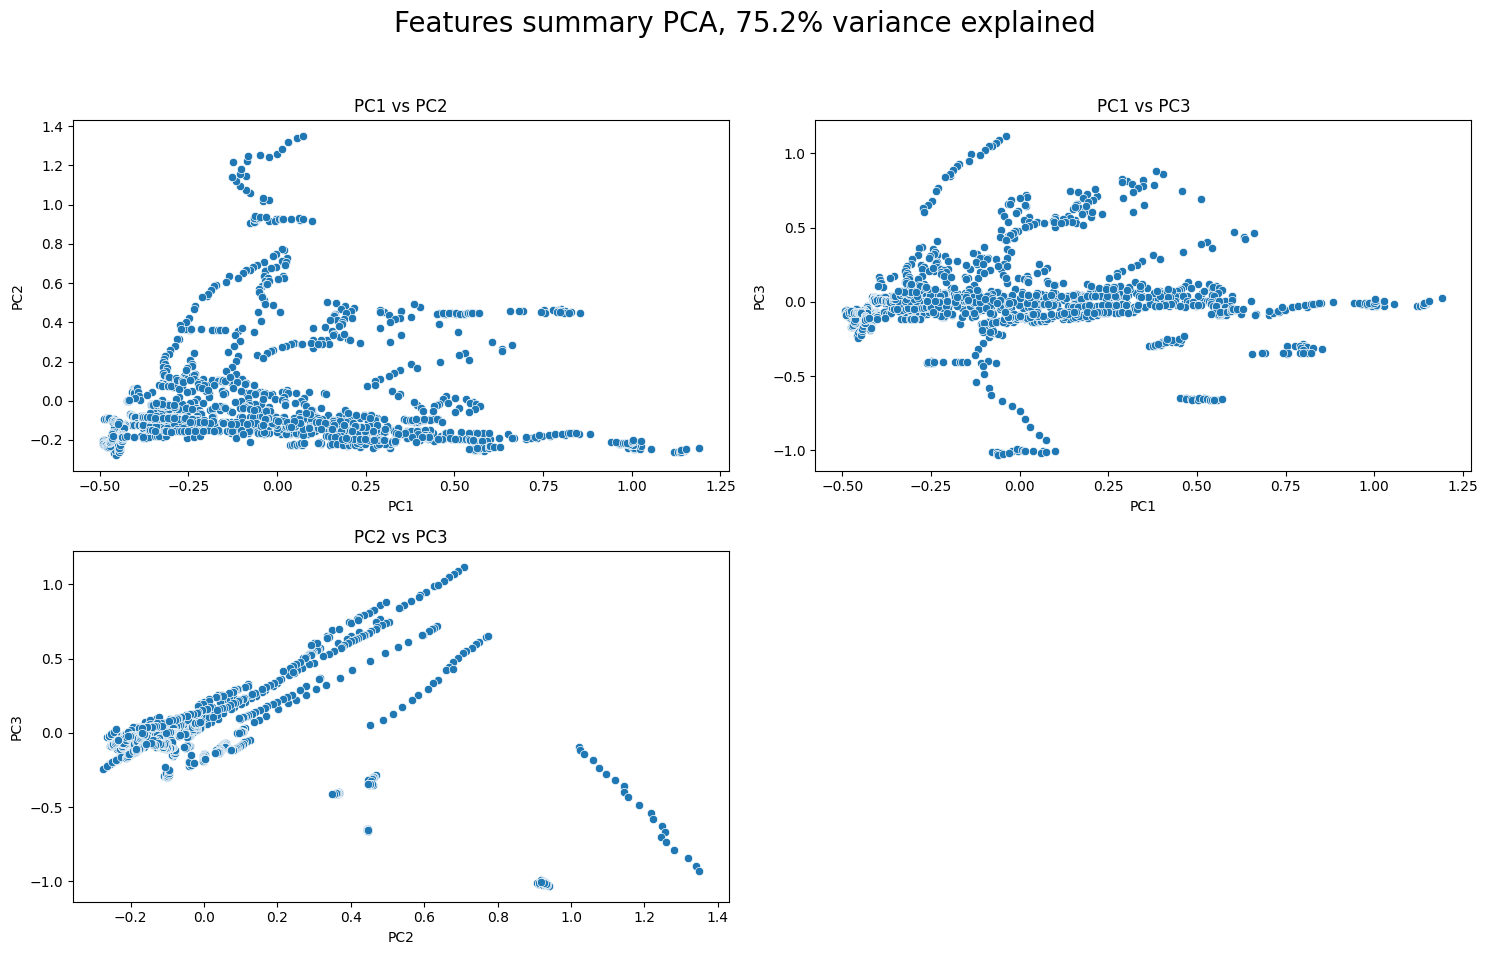

In [12]:
x = features_pca_x[:, 0]
y = features_pca_x[:, 1]
z = features_pca_x[:, 2]
pc_var = 100 * features_PCA.explained_variance_ratio_.cumsum()[2]  # Changed to index 2 for 3 components

# Creating a DataFrame for better plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'PC1': x,
    'PC2': y,
    'PC3': z
})

# Plotting
plt.figure(figsize=(15, 10))

# Scatter plots for combinations of three components
plot_combinations = [
    ('PC1', 'PC2'),
    ('PC1', 'PC3'),
    ('PC2', 'PC3')
]

for i, (pc1, pc2) in enumerate(plot_combinations):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=data[pc1], y=data[pc2])
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.title(f'{pc1} vs {pc2}')

# Overall title
plt.suptitle(f'Features summary PCA, {pc_var:.1f}% variance explained', size=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We'll look at feature strength within the first three components below.

In [13]:
pca_components_df = pd.DataFrame(features_PCA.components_, columns=features_scaled_df.columns)

In [14]:
def sort_features_by_loading(component):
    return component.abs().sort_values(ascending=False)
for i in range(3):
    print(f"\nTop features for Component {i}:")
    sorted_features = sort_features_by_loading(pca_components_df.iloc[i])
    print(sorted_features.head(10))


Top features for Component 0:
low_carbon_electricity_%           0.785912
renewable_energy_share_final_%     0.435292
renewable_energy_share_primary_%   0.418630
Land Area(Km2)                     0.073610
energy_intensity_mj_ppp            0.068880
Density(P/Km2)                     0.058648
electricity_renewables_Twh         0.038404
electricity_nuclear_Twh            0.035408
gdp_growth                         0.022394
electricity_fossil_fuels_Twh       0.015855
Name: 0, dtype: float64

Top features for Component 1:
Land Area(Km2)                              0.645660
clean_fuels_access_%                        0.511880
co2_emissions_kt                            0.270616
electricity_fossil_fuels_Twh                0.251166
electricity_access_%                        0.204283
electricity_nuclear_Twh                     0.188303
primary_energy_consumption_per_capita_twh   0.167918
electricity_renewables_Twh                  0.166664
renewable_energy_share_final_%              0.1619

Land area, clean fuel access, and renewable % final play an important role in our dataset.

Land area - #1 in PC1, #2 in PC2 <br>
Clean fuel access - #2 in PC1, #1 in PC2 <br>
Renweable Final % - #2 in PC0, #3 in PC2  





Let's see if we can engineer some new features using these three in conjuction with primary energy consumption, our strongest correlator to the target.

* land_consumption_ratio = land area / primary consumption <br>
* clean_fuel_consumption_ratio = clean fuel access / primary consumption <br>
* renewable_final_consumption_ratio = renweable_final / primary consumption <br>

In [15]:
df['land_consumption_ratio'] = df['Land Area(Km2)'] / df['primary_energy_consumption_per_capita_twh']
df['clean_fuel_consumption_ratio'] = df['clean_fuels_access_%'] / df['primary_energy_consumption_per_capita_twh']
df['renewable_final_consumption_ratio'] = df['renewable_energy_share_final_%'] / df['primary_energy_consumption_per_capita_twh']

<ipython-input-21-2620a09e9e91>:26: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[2].set_xlim(df['renewable_final_consumption_ratio'].min() * 0.9, df['renewable_final_consumption_ratio'].max() * 1.1)  # Set limits with padding


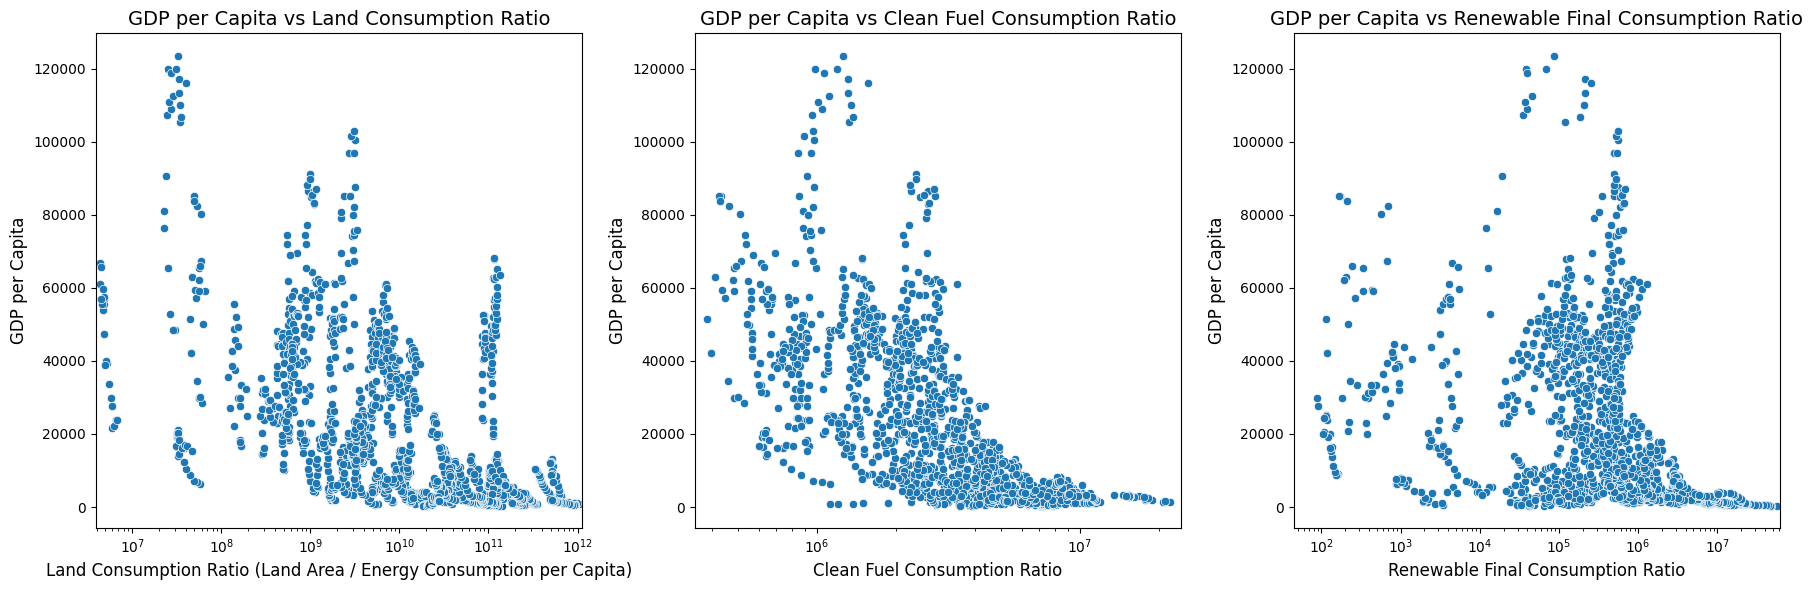

In [21]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Land Consumption Ratio vs GDP per Capita
sns.scatterplot(data=df, x='land_consumption_ratio', y='gdp_per_capita', ax=axes[0])
axes[0].set_title('GDP per Capita vs Land Consumption Ratio', fontsize=14)
axes[0].set_xlabel('Land Consumption Ratio (Land Area / Energy Consumption per Capita)', fontsize=12)
axes[0].set_ylabel('GDP per Capita', fontsize=12)
axes[0].set_xscale('log')  # Set x-axis to logarithmic scale
axes[0].set_xlim(df['land_consumption_ratio'].min() * 0.9, df['land_consumption_ratio'].max() * 1.1)  # Set limits with padding

# Scatter plot for Clean Fuel Consumption Ratio vs GDP per Capita
sns.scatterplot(data=df, x='clean_fuel_consumption_ratio', y='gdp_per_capita', ax=axes[1])
axes[1].set_title('GDP per Capita vs Clean Fuel Consumption Ratio', fontsize=14)
axes[1].set_xlabel('Clean Fuel Consumption Ratio', fontsize=12)
axes[1].set_ylabel('GDP per Capita', fontsize=12)
axes[1].set_xscale('log')  # Set x-axis to logarithmic scale
axes[1].set_xlim(df['clean_fuel_consumption_ratio'].min() * 0.9, df['clean_fuel_consumption_ratio'].max() * 1.1)  # Set limits with padding

# Scatter plot for Renewable Final Consumption Ratio vs GDP per Capita
sns.scatterplot(data=df, x='renewable_final_consumption_ratio', y='gdp_per_capita', ax=axes[2])
axes[2].set_title('GDP per Capita vs Renewable Final Consumption Ratio', fontsize=14)
axes[2].set_xlabel('Renewable Final Consumption Ratio', fontsize=12)
axes[2].set_ylabel('GDP per Capita', fontsize=12)
axes[2].set_xscale('log')  # Set x-axis to logarithmic scale
axes[2].set_xlim(df['renewable_final_consumption_ratio'].min() * 0.9, df['renewable_final_consumption_ratio'].max() * 1.1)  # Set limits with padding

# Improve layout
plt.tight_layout()

# Show the plots
plt.show()

For land and fuel consumption ratios, we see higher gdp_per_capitas achieved for countries who minimize these ratios.

In [17]:
def save_file(dataframe, filename, datapath):
    filepath = os.path.join(datapath, filename)
    dataframe.to_csv(filepath, index=False)

In [24]:
df.to_csv('/content/energy_engineered.csv', index=False)